<a href="https://colab.research.google.com/github/githubsaniya924/Hypothesis_Testing/blob/main/PairedTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Paired test is used to understand whether a particular event has an  effect or not.

#H0 - No difference in the prefernce
#Ha - Difference in the preference

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Paired - Binary Test

In [ ]:
before = np.array([0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1])

after = np.array([1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,1])

In [ ]:
#considering this two array as columns to form a data frame
data = pd.DataFrame(
    {
    'before': before,
    'after': after
}
    )

In [ ]:
data.head()

,before,after
0,0,1
1,1,0
2,1,0
3,1,1
4,0,1


In [ ]:
#Create a crosstab
mycrosstab = pd.crosstab(data['before'],data['after'])

In [ ]:
mycrosstab

after,0,1
before,,
0,4,3
1,4,5


In [ ]:
#TO find the pvalue we need to use the Mcnemar test
from statsmodels.stats.contingency_tables import mcnemar

print(mcnemar(mycrosstab,exact=True,correction=False)) #if exact test is used than we consider that the correction should be false

pvalue      1.0
statistic   3.0


In [ ]:
#The pvalue is not less than 0.05
#Here we can say that there is no difference in the prefernence of the people after the event.
#We cannot reject the null hypothesis

#We cannot find the effect size
#But lets find it for understanding

In [ ]:
#For effect size we use the cohen h test
a = 4 #before=0,after=1
b = 5 #before=1,after=0

In [ ]:
h = ((a-b)**2)/ (a+b)
h

0.1111111111111111

In [ ]:
if h < 0.2:
  print('Small')
elif h<0.5:
  print('medium')
elif h<0.8:
  print('large')
else:
  print('very large')

Small


Paired test - Nominal data

In [ ]:
categories = ['Cat','Dog','Parrot','Snake']

#We are going to take survey and find are these four animals equally liked by the people

num_individual = 50

before1 = np.random.choice(categories,size=num_individual)
#The 50 people visited a zoo and saw these animals again
#After observing the animals, again a survey was taken to check their prefrences

after1 = np.random.choice(categories,size=num_individual)

#Research question - is there a change in the prefernce or not

#H0 - no change in the prefernce after the event
#Ha - change in the prefernce after the event

In [ ]:
data1 = pd.DataFrame({
    'before1':before,
    'after1':after
})

In [ ]:
data1.head()

,before1,after1
0,Cat,Parrot
1,Dog,Dog
2,Cat,Parrot
3,Parrot,Parrot
4,Snake,Cat


In [ ]:
mycrosstab1 = pd.crosstab(data1['before1'],data1['after1'])

In [ ]:
mycrosstab1

after1,Cat,Dog,Parrot,Snake
before1,,,,
Cat,2,6,4,2
Dog,1,4,2,0
Parrot,6,4,4,2
Snake,2,4,3,4


In [ ]:
from statsmodels.stats.api import SquareTable

print(SquareTable(mycrosstab1,shift_zeros=False).homogeneity(method='bhapkar'))

df          3
pvalue      0.02960298969162234
statistic   8.97664733006099


In [ ]:
#The pvalue<0.05
#We can say that the null hypothesis is rejected

#There is no test to find the effect size for nominal dataset

Paired test  - Ordinal data

In [ ]:
num_patients = 20

before2 = np.random.randint(1,5,num_patients)

after2 = np.random.randint(1,5,num_patients)

In [ ]:
#making a dataframe
data2 = pd.DataFrame({
    'before2':before,
    'after2':after
})

In [ ]:
data2.head()

,before2,after2
0,1,4
1,4,1
2,4,1
3,4,2
4,2,2


In [ ]:
mycrosstab2 = pd.crosstab(data2['before2'],data2['after2'])

In [ ]:
mycrosstab2

after2,1,2,3,4
before2,,,,
1,2,2,1,3
2,1,1,1,0
3,0,1,3,1
4,3,1,0,0


In [ ]:
#using wilcoxon signed rank test to find the pvalue
import scipy
from scipy.stats import wilcoxon

wilcoxon(data2['before2'],data2['after2'],correction=False)


WilcoxonResult(statistic=49.0, pvalue=0.823018867407208)

In [ ]:
 statistic=49.0
 pvalue=0.823018867407208
 #pvalue is not less than 0.05, therefore we cannot reject the null hypothesis

In [ ]:
from scipy.stats import norm

z_value = norm.ppf(1-(pvalue/2))

import math

r_ros = abs(z_value/math.sqrt(data2.shape[0]))

r_ros

0.050012759984895724

In [ ]:
if r_ros < 0.2:
  print('very low')
elif r_ros <0.4:
  print('low')
elif r_ros <0.6:
  print('moderate')
elif r_ros <0.8:
  print('strong')
else:
  print('very strong')

very low


Paired test - scale

In [ ]:
num_people = 50
before3 = np.random.normal(loc=70,scale=10,size=num_people)

after3 = np.random.normal(loc=30,scale=20,size=num_people)

In [ ]:
data3 = pd.DataFrame({
    'before':before3,
    'after':after3
})

In [ ]:
data3.head()

,before,after
0,73.871646,37.365466
1,88.081295,37.130972
2,77.565338,31.992440
3,65.383629,28.065461
4,66.840786,3.414679


In [ ]:
data3.describe()

,before,after
count,50.000000,50.000000
mean,69.992739,29.831083
std,9.649152,21.061414
min,45.865081,-29.155847
25%,64.457985,16.501340
50%,70.022809,27.455860
75%,76.793200,40.737154
max,88.535717,93.564416


<function matplotlib.pyplot.show(close=None, block=None)>

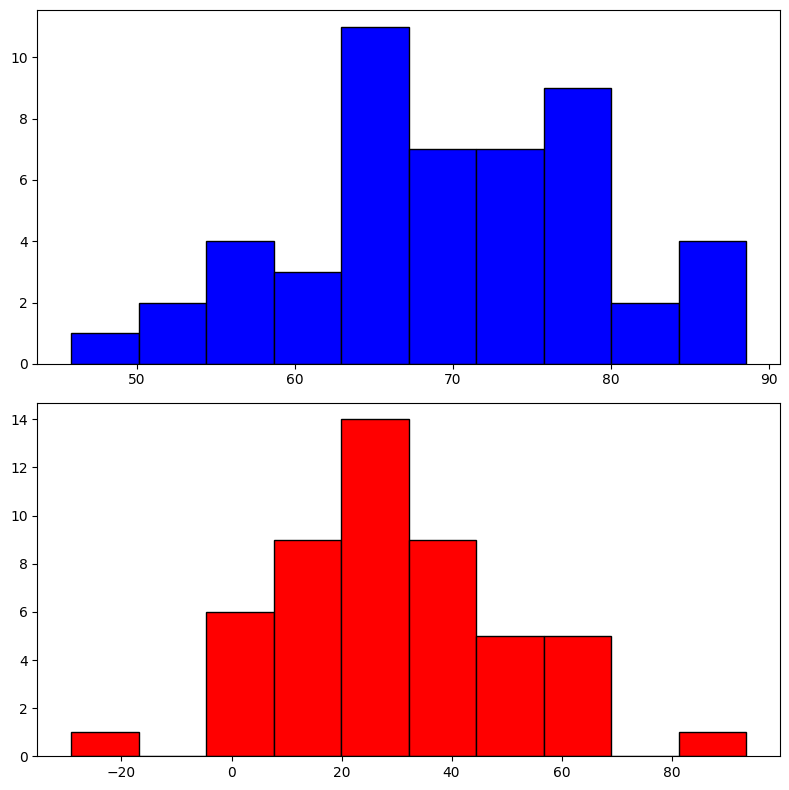

In [ ]:
#Visualization
fig, ax = plt.subplots(2,1,figsize = (8,8))

ax[0].hist(data3['before'], bins=10,color='blue',edgecolor='black')
ax[1].hist(data3['after'], bins=10,color='red',edgecolor='black')

plt.tight_layout()
plt.show

In [ ]:
import scipy
from scipy.stats import ttest_rel
ttest_rel(data3['before'],data3['after'])

TtestResult(statistic=12.589716135649525, pvalue=5.666784060232308e-17, df=49)

In [ ]:
#pvalue<0.05
#Therefore we can reject the null hypothesis
#The effect size is cohen's d
#To use the cohen's d test we need to install a package

In [ ]:
!pip install researchpy

from researchpy import ttest as rpttest

In [ ]:
rpttest(data['before'],data['after'],equal_variances=True,paired=True)

/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:301: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'before' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = group1_name
/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:419: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Difference (before - after) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table2.iloc[0,0] = f"Difference ({group1_name} - {group2_name}) = "


(  Variable     N    Mean        SD        SE  95% Conf.  Interval
 0   before  16.0  0.5625  0.512348  0.128087   0.289489  0.835511
 1    after  16.0  0.5000  0.516398  0.129099   0.224831  0.775169
 2     diff  16.0  0.0625  0.680074  0.170018  -0.299886  0.424886,
              Paired samples t-test  results
 0   Difference (before - after) =    0.0625
 1            Degrees of freedom =   15.0000
 2                             t =    0.3676
 3         Two side test p value =    0.7183
 4        Difference < 0 p value =    0.3592
 5        Difference > 0 p value =    0.6408
 6                     Cohen's d =    0.0919
 7                  Cohen's d_av =    0.1215
 8                     Hedge's g =    0.0896
 9                Glass's delta1 =    0.1220
 10             Point-Biserial r =    0.0945)

In [ ]:
d =    0.0919

D = d*(2**0.5)
D

0.12996622638208744

In [ ]:
if D < 0.2:
  print('Very weak')
elif D<0.5:
  print('weak')
elif D<8:
  print('Moderate')
elif D <1.20:
  print('Strong')
else:
  print('Very Strong')

Very weak
